<p style="text-align: center; font-size: 28px; font-weight: bold;">CIND 123</p>
<p style="text-align: center; font-size: 24px; font-weight: bold;">Data Analytics: Basic Methods</p>
<p style="text-align: center; font-size: 24px; font-weight: bold;">Assignment 2 (10%)</p>

**Yinghao Li**  
**CIND123 DHC 501342626**

<p style="text-align: center; font-size: 20px; font-weight: bold;">Instructions</p>
 
This assignment can be submitted using either Python or R, whichever you prefer.

- **If using R**, you must submit an RMD file with its knitted file (PDF or HTML). To learn more about knitting and R markdown, visit [R Markdown](http://rmarkdown.rstudio.com).
- **If using Python**, you must submit an IPYNB file and its exported PDF/HTML with clearly printed/shown answers.

Failing to submit both files ({RMD + knitted PDF/HTML} OR {IPYNB + PDF/HTML}) will be subject to a 30% mark deduction.

**NOTE:** IF YOU USE `R STUDIO`, YOU SHOULD NEVER HAVE `install.packages` IN YOUR CODE; OTHERWISE, THE `Knit` OPTION WILL RAISE AN ERROR. COMMENT OUT ALL PACKAGE INSTALLATIONS BUT KEEP `library()` CALLS.

**NOTE:** If you answer the questions in R, all your answers should be in R (ignore Python questions). If you answer the questions in Python, all your answers should be in Python (ignore R questions). You are not allowed to switch languages in this assignment.

<p style="font-size: 24px; font-weight: bold;">Question 1 (50 points)</p>

The Titanic Passenger Survival Data Set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner “Titanic.” The dataset is available from the Department of Biostatistics at the Vanderbilt University School of Medicine ([Titanic Dataset](https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.csv)) in several formats. Read the Titanic Data Set `titanicDataset` using the appropriate commands in `R` or `Python`.

https://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.csv

| Column Name | Description                         | Values                                  |
|-------------|-------------------------------------|-----------------------------------------|
| survival    | Survival                            | 0 = No, 1 = Yes                         |
| pclass      | Ticket class                        | 1 = 1st, 2 = 2nd, 3 = 3rd               |
| sex         | Sex                                 |                                         |
| age         | Age in years                        |                                         |
| sibsp       | # of siblings / spouses aboard the Titanic |                                         |
| parch       | # of parents / children aboard the Titanic |                                         |
| ticket      | Ticket number                       |                                         |
| fare        | Passenger fare                      |                                         |
| cabin       | Cabin number                        |                                         |
| embarked    | Port of Embarkation                 | C = Cherbourg, Q = Queenstown, S = Southampton |

<p style="font-size: 20px; font-weight: bold;">Q1a (5 points)</p>

Extract and show the columns `name`, `fare`, `sibsp`, and `parch` into a new data frame (or DataFrame in Python) named `titanicSubset`.

Show the `head` of the dataframe.

In [5]:
import pandas as pd

titanic = "D:\\Ryerson Big Data Certificate\\CIND123-Data Analytics Basic Methods\\Assignment2\\titanic.csv"
df = pd.read_csv(titanic)
titanicSubset = df.loc[:,['name', 'fare', 'sibsp','parch']]
print(titanicSubset)
print("==================================")
print(df.head())

                                                 name      fare  sibsp  parch
0                       Allen, Miss. Elisabeth Walton  211.3375      0      0
1                      Allison, Master. Hudson Trevor  151.5500      1      2
2                        Allison, Miss. Helen Loraine  151.5500      1      2
3                Allison, Mr. Hudson Joshua Creighton  151.5500      1      2
4     Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  151.5500      1      2
...                                               ...       ...    ...    ...
1304                             Zabour, Miss. Hileni   14.4542      1      0
1305                            Zabour, Miss. Thamine   14.4542      1      0
1306                        Zakarian, Mr. Mapriededer    7.2250      0      0
1307                              Zakarian, Mr. Ortin    7.2250      0      0
1308                               Zimmerman, Mr. Leo    7.8750      0      0

[1309 rows x 4 columns]
   pclass  survived                    

<p style="font-size: 20px; font-weight: bold;">Q1b (5 points)</p>

Numerical data: Calculate the total number of passengers who were children (age less than 18) and survived. Use the `count()` function from the `dplyr` package in R or appropriate `pandas` functions in Python.

Print the value.

In [8]:
survived = df[(df['age']<18)&(df['survived']==1)]
print(survived.shape[0])

81


<p style="font-size: 20px; font-weight: bold;">Q1c (5 points)</p>

Categorical data: Calculate the number of passengers by sex using the `count()` and `group_by()` functions from the `dplyr` package in R, or equivalent `pandas` functions in Python.

Print the value.

In [9]:
sex_count = df['sex'].value_counts()
print(sex_count)

sex
male      843
female    466
Name: count, dtype: int64


<p style="font-size: 20px; font-weight: bold;">Q1d (5 points)</p>

Find the passengers in the data frame whose age information is missing, and fill them with the median age of passengers.

Show the head of the dataframe.

In [16]:
age_median = df['age'].median()
print("median age: ", age_median)
print("=================================")
df['age'].fillna(age_median)
print(df.head())

median age:  28.0
   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                  

<p style="font-size: 20px; font-weight: bold;">Q1e (5 points)</p>

Use the `aggregate()` function to calculate the survival count of each passenger class (`pclass`) and calculate the survival rate of passengers in each class. Draw a conclusion on which passenger class has the highest survival rate.

Print the value and type your respond as a comment.

In [21]:
survived_sum_count = df.groupby('pclass').aggregate({'survived':['sum', 'count']})
print(survived_sum_count)
print("=======================")

survived_sum_count['survived_rate'] = survived_sum_count['survived']['sum']/survived_sum_count['survived']['count']
print(survived_sum_count)
"""
According to the statistics result, it is very clear that the first class has the highest survival rate, which is 61.92%.
The second class has a survival rate of 42.96%.
The third class has the lowest survival rate, which is 25.52%.
"""

       survived      
            sum count
pclass               
1           200   323
2           119   277
3           181   709
       survived       survived_rate
            sum count              
pclass                             
1           200   323      0.619195
2           119   277      0.429603
3           181   709      0.255289


'\nAccording to the statistics result, it is very clear that the first class has the highest survival rate, which is 61.92%.\nThe second class has a survival rate of 42.96%.\nThe third class has the lowest survival rate, which is 25.52%.\n'

<p style="font-size: 20px; font-weight: bold;">Q1f (5 points)</p>

Use a boxplot to display the distribution of fare for each sex. Infer which gender tends to pay higher fares.

Have the plot and then your comment.

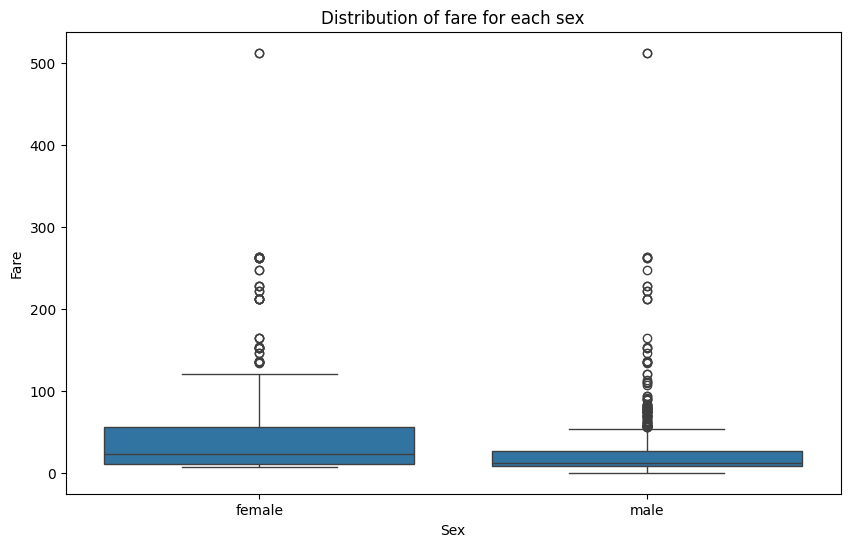

'\nAccording to the boxplot we can see that the median fare of female is higher than male,\nalso the IQR of female is higher than male.\nThus, we have the conclusion that female tend to pay higher fare than male.\n'

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='fare', data=df)
plt.title('Distribution of fare for each sex')
plt.xlabel('Sex')
plt.ylabel('Fare')

plt.show()

"""
According to the boxplot we can see that the median fare of female is higher than male,
also the IQR of female is higher than male.
Thus, we have the conclusion that female tend to pay higher fare than male.
"""

<p style="font-size: 20px; font-weight: bold;">Q1g (5 points)</p>

Calculate the mean fare for each sex. Describe if the calculation aligns with the boxplot.

Print the value and comment on it.

In [26]:
mean_fare = df.groupby('sex')['fare'].mean()
print(mean_fare)
"""
The female mean is higher than male, which is aligns with the boxplot.
"""

sex
female    46.198097
male      26.154601
Name: fare, dtype: float64


<p style="font-size: 20px; font-weight: bold;">Q1h (10 points)</p>

Use a `for` loop and `if` control statements to list the names of women, aged 50 or older, who embarked from Southampton (S) on the Titanic. Ensure these women have non-empty home destinations.

Print first 5 people only.

In [28]:
name = []

for num, row in df.iterrows():
    if row['sex'] == 'female' and row['age'] >= 50 and row['embarked'] == 'S' and pd.notna(row['home.dest']):
        name.append(row['name'])
print(name[0:5])

['Andrews, Miss. Kornelia Theodosia', 'Appleton, Mrs. Edward Dale (Charlotte Lamson)', 'Bonnell, Miss. Elizabeth', 'Brown, Mrs. John Murray (Caroline Lane Lamson)', 'Cavendish, Mrs. Tyrell William (Julia Florence Siegel)']



<p style="font-size: 20px; font-weight: bold;">Q1i (5 points)</p>

Use a scatter plot to show the relation between the `fare` and `age` of passengers. Interpret the correlation between these two by looking at the plot.

Have the plot and then comment on it.

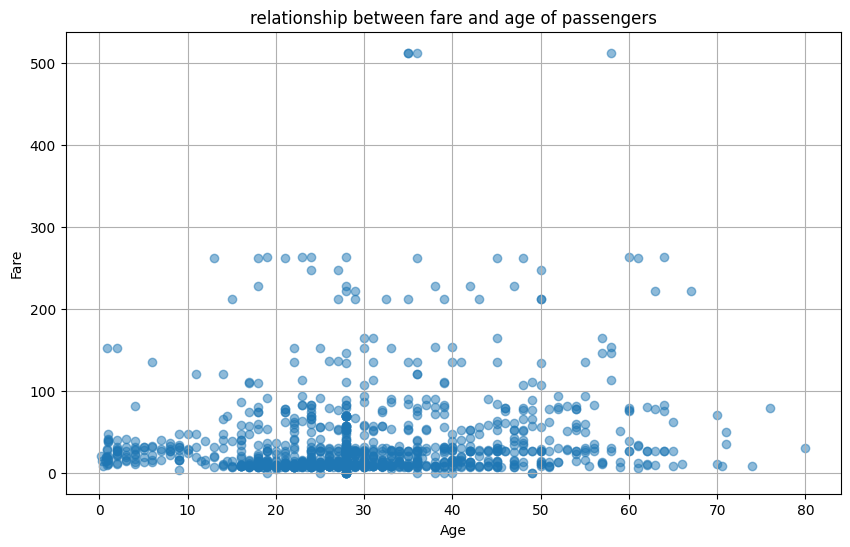

'\nFrom the scatter plot, we can see there is no strong relationship betwen age and Fare.\nMost people pay the fare at low price below 100, few people pay at 100-200,\nonly a few people pay above 500.\nThis phenomenon is true for all age people.\n'

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['fare'], alpha=0.5)
plt.title('relationship between fare and age of passengers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.grid(True)

plt.show()

"""
From the scatter plot, we can see there is no strong relationship betwen age and Fare.
Most people pay the fare at low price below 100, few people pay at 100-200,
only a few people pay above 500.
This phenomenon is true for all age people.
"""

<p style="font-size: 24px; font-weight: bold;">Question 2 (20 points)</p>

100 computers work together in a network. Based on historical data, each computer has a probability of 0.03 of encountering a software issue. If a computer encounters an issue, it affects the network’s performance.

<p style="font-size: 20px; font-weight: bold;">Q2a (5 points)</p>

Determine the probability that the network operates without any computer encountering a software issue.

**Hint:** Use the Binomial probability formula.

Print the value.

We can use the Binomial probability formula:
$$
P = \binom{n}{k} p^k (1-p)^{n-k}
$$

k=0
n=100
p=0.03

$$ P=\binom{100}{0} 0.03^0 0.97^{100} = 0.04755 $$

So, the probability that the network operated without any computer encoutering a software issue is 4.755%.


<p style="font-size: 20px; font-weight: bold;">Q2b (5 points)</p>

Utilize the Binomial approximation to estimate the probability that at least 5 computers out of 100 encounter software issues.

**Hint:** Use the Binomial cumulative distribution function.


Print the value.

The probability that at least 5 computers out of 100 encounter software issues:
P(X>=5)=1-P(X<=4)=1-P(X=1)-P(X=2)-P(X=3)-P(X=4)

Below is the python code:

In [3]:
from scipy.stats import binom

n = 100
p = 0.03

prop = binom.cdf(4, n, p)
result = 1 - prop
print("The probability is: ", result)


The probability is:  0.1821451939243579



<p style="font-size: 20px; font-weight: bold;">Q2c (10 points)</p>

Assume the first and second computers are independent. Calculate the conditional probability that the second computer (Computer B) encounters a software issue given that the first computer (Computer A) does not encounter any issue.

**Hint:** Use the definition of conditional probability.


Print the value.

The conditional probability formula is:
$$
P(B \mid A) = \frac{P(B \cap A)}{P(A)}
$$
B is the second computer encounters a software issue. B=0.03
A is the first computer does not enounter any issue. A=0.97

$$
P(B \mid A) = (0.03*0.97)/{0.97} = 0.03
$$

The probability that the second computer encounters a software issue given that the first computer does not encounter any issue is 3%.

<p style="font-size: 24px; font-weight: bold;">Question 3 (30 points)</p>

On average, John receives 3 emails a day. Using `R` or `Python`, 

<p style="font-size: 20px; font-weight: bold;">Q3a (5 points)</p>

Calculate the probabilities that John receives 2, 3, ..., up to 9 emails in a day.

Print the value.

In [7]:
"""
We can use the Poisson Distribution formula
"""

import math

l_lambda = 3
k = [2, 3, 4, 5, 6, 7, 8, 9]

for i in k:
    result = (l_lambda**i) * math.exp(-l_lambda) / math.factorial(i)
    print("The probabilities that John receives {} emails in a day is {}".format(i, result))

The probabilities that John receives 2 emails in a day is 0.22404180765538775
The probabilities that John receives 3 emails in a day is 0.22404180765538775
The probabilities that John receives 4 emails in a day is 0.16803135574154082
The probabilities that John receives 5 emails in a day is 0.10081881344492448
The probabilities that John receives 6 emails in a day is 0.05040940672246225
The probabilities that John receives 7 emails in a day is 0.02160403145248382
The probabilities that John receives 8 emails in a day is 0.008101511794681432
The probabilities that John receives 9 emails in a day is 0.002700503931560477


<p style="font-size: 20px; font-weight: bold;">Q3b (5 points)</p>

Determine the probability that John receives 4 emails or more in a day.

Print the value.

The probability that John receives 4 emails or more in a day is:
P(X>=4)=1-P(X<=3)

In [9]:
from scipy.stats import poisson

l_lambda = 3

prop_3 = poisson.cdf(3, l_lambda)
result = 1 - prop_3
print("The probability that John receives 4 emails or more in a day is: ", result)

The probability that John receives 4 emails or more in a day is:  0.35276811121776874


<p style="font-size: 20px; font-weight: bold;">Q3c (20 points)</p>

Compare the similarity between Binomial and Poisson distributions given the previous examples.

Comment on it.

Both distributions can be used to model the probability of discret events. The Poisson distribution is more suitable for modeling continuous interval events while Binomial distribution is more suitable for fixed number with an either success or fail outcome and a constant probability of success.

<p style="font-size: 18px; font-weight: bold;">Q3c1 (5 points)</p>

Generate 50,000 samples for a Binomial random variable using parameters described in Question 2.

No need to print anything. Just the code.

In [12]:
import numpy as np

n = 100
p = 0.03
N = 50000

samples_binomial = np.random.binomial(n, p, N)

<p style="font-size: 18px; font-weight: bold;">Q3c2 (5 points)</p>

Generate 50,000 samples for a Poisson random variable using parameters described in Question 3.

No need to print anything. Just the code.

In [13]:
import numpy as np

l_lambda = 3
N = 50000

samples_poisson = np.random.poisson(l_lambda, N)

<p style="font-size: 18px; font-weight: bold;">Q3c3 (10 points)</p>

Illustrate how well the Poisson probability distribution approximates the Binomial probability distribution in the previous questions.

**Hint**: Use histograms or other visualization tools.

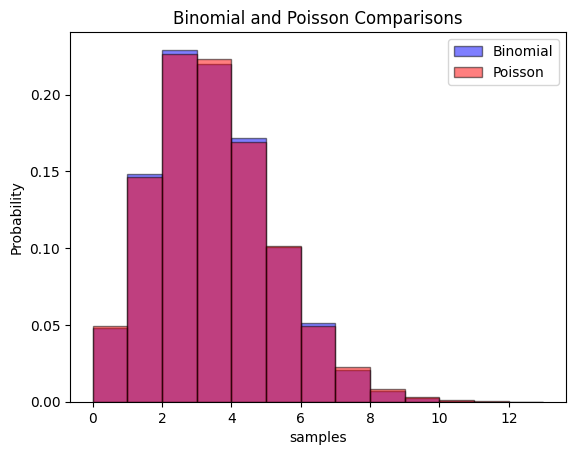

'\nWhen n=50000, which is a large sample number, the Poisson distribution provides a good approximation of the Binomial distribution.\nBoth distributions have peaks around 3 and the shapes of both are similiar.\n'

In [19]:
"""
Use the previously generated 50000 sample from both the Binomial and Poisson to draw the histograms to illustrate.
"""

import matplotlib.pyplot as plt

plt.hist(samples_binomial, bins=range(0, max(samples_binomial)+2), density=True, alpha=0.5, color='b', edgecolor='k', label='Binomial')
plt.hist(samples_poisson, bins=range(0, max(samples_poisson)+2), density=True, alpha=0.5, color='r', edgecolor='k', label='Poisson')
plt.title("Binomial and Poisson Comparisons")
plt.xlabel('samples')
plt.ylabel('Probability')
plt.legend()
plt.show()

"""
When n=50000, which is a large sample number, the Poisson distribution provides a good approximation of the Binomial distribution.
Both distributions have peaks around 3 and the shapes of both are similiar.
"""